In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #Plotting properties
import seaborn as sns #Plotting properties

In [2]:
#Validation dataset
val=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\CDAC-DBDA\2024\Internship\prodigy_infotech\task4\twitter_validation.csv", header=None)

In [3]:
#Full dataset for Train-Test
train=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\CDAC-DBDA\2024\Internship\prodigy_infotech\task4\twitter_training.csv", header=None)

#1. Initial data transformation

As an initial approach, all the main libraries and functions were summarized in the following cell, focusing on data visualization, text analysis, text vectorization, and model building.

Additionally, the stopwords from English were downloaded from the nltk library.

In [4]:
train.columns=['id','information','type','text']
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
val.columns=['id','information','type','text']
val.head()

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [6]:
train_data=train
train_data

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [7]:
val_data=val
val_data

,id,information,type,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [8]:
df = pd.concat([train_data, val_data])

In [9]:
df.head()

,id,information,type,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [10]:
train_data.shape

(74682, 4)

In [11]:
val_data.shape

(1000, 4)

In [12]:
df.shape

(75682, 4)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75682 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           75682 non-null  int64 
 1   information  75682 non-null  object
 2   type         75682 non-null  object
 3   text         74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [14]:
# check null values
df.isna().sum()

id               0
information      0
type             0
text           686
dtype: int64

In [15]:
# drop null values
df.dropna(inplace=True)

In [16]:
# check duplicates values
df.duplicated().sum()

2857

In [17]:
# drop duplicates
df.drop_duplicates(inplace=True)

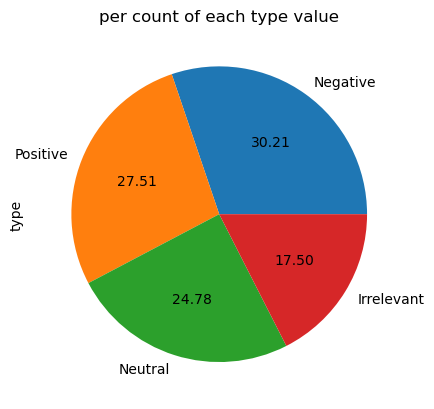

In [18]:
# value count of target col
df['type'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title("per count of each type value")
plt.show()

In [19]:
type_count = df['type'].value_counts().reset_index()
type_count

,index,type
0,Negative,21790
1,Positive,19846
2,Neutral,17879
3,Irrelevant,12624


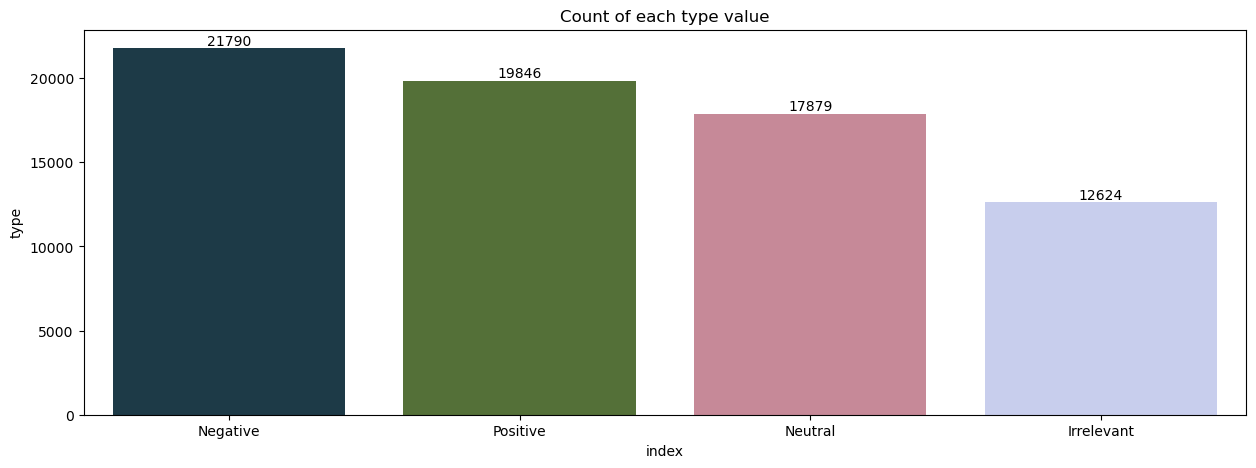

In [20]:
plt.figure(figsize=(15,5))
ax = sns.barplot(data=type_count,x='index',y='type',palette='cubehelix')
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Count of each type value")
plt.show()

In [21]:
# tweet count of each user
tweet_count = df.groupby('id')['type'].count().sort_values(ascending=False).reset_index()
tweet_count = tweet_count.rename(columns={'type':'count'})
tweet_count

,id,count
0,8371,7
1,8846,7
2,2752,7
3,10429,7
4,2131,7
...,...,...
12442,4717,2
12443,5647,2
12444,5603,2
12445,3108,2


In [22]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [23]:
# text processing
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

# regular expression
import re

# wordcloud
from wordcloud import WordCloud
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
pip install xgboost

     ------------------------------------ 124.9/124.9 MB 721.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [25]:
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder #Variable encoding and decoding for XGBoost

To prepare the data for the text analysis an additional row was created using the method of str.lower. However, as there were some texts with only numerical values (such as one that only had a 2 as the tweet) an additional function was used for transforming all the data to string.

Then, a regex expression erased the special characters as it is common to have digitation problems on Twitter.

In [26]:
#Text transformation
df["lower"]=df.text.str.lower() #lowercase
df["lower"]=[str(data) for data in df.lower] #converting all to string
df["lower"]=df.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

In [27]:
df.head()

,id,information,type,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


# 2. Plotting features

As to identify the main words that were used per label, a word_cloud was used to see which are the most important words on the train data. For example, on the positive label words such as love and game were mostly used alongside a wide variety of words classified as "good sentiments".

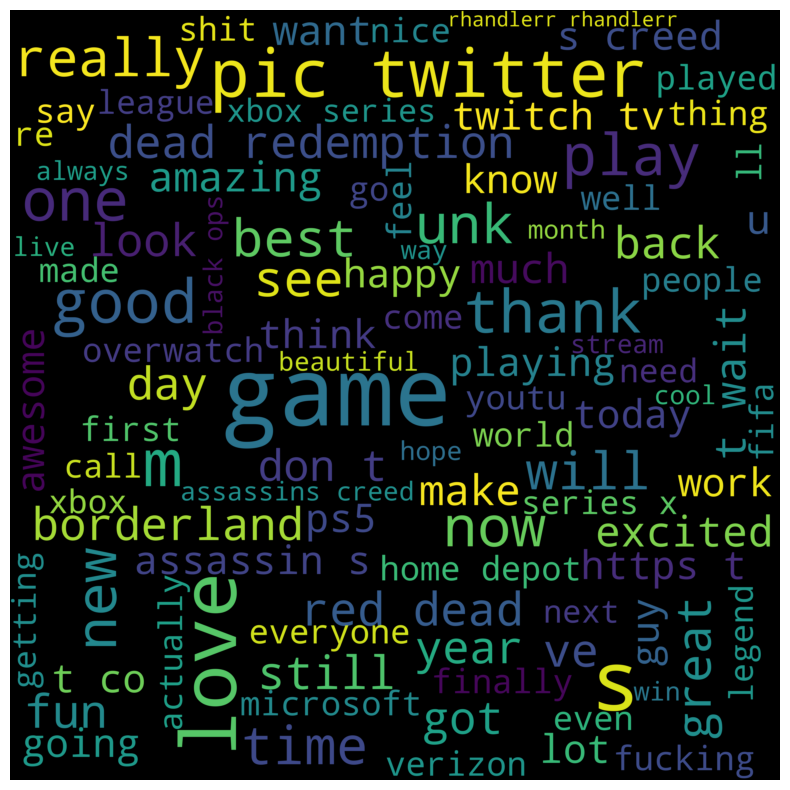

In [28]:
word_cloud_text = ''.join(df[df["type"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

As for the negative tweets, some curse words were the most important while the names of some games and industries were also very used, such as facebook and eamaddennfl.

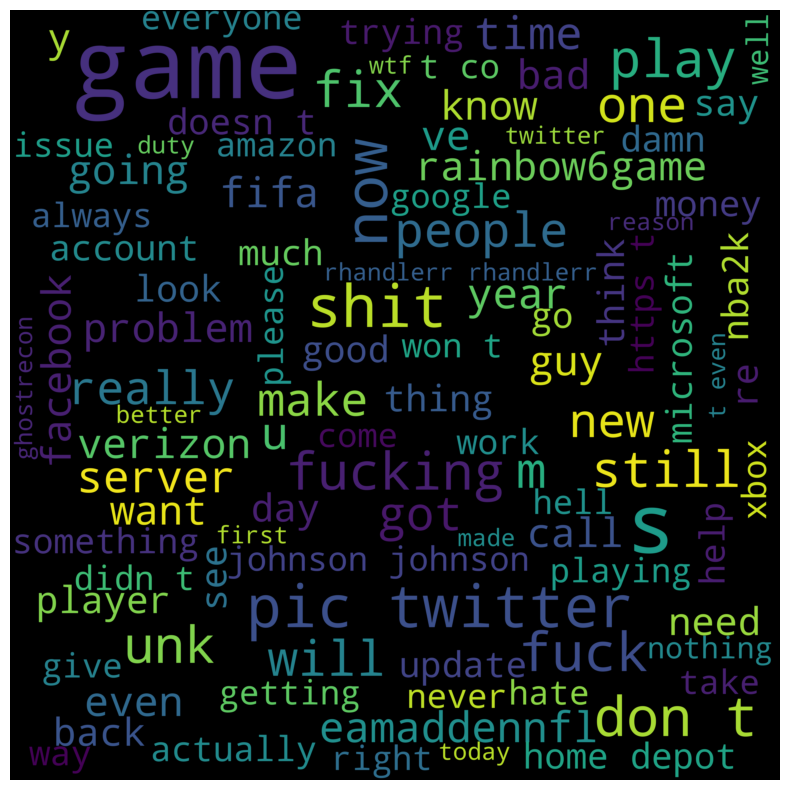

In [29]:
word_cloud_text = ''.join(df[df["type"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


The irrelevant tweets show a similar trend as negative ones, something that will impact the overall prediction performance.

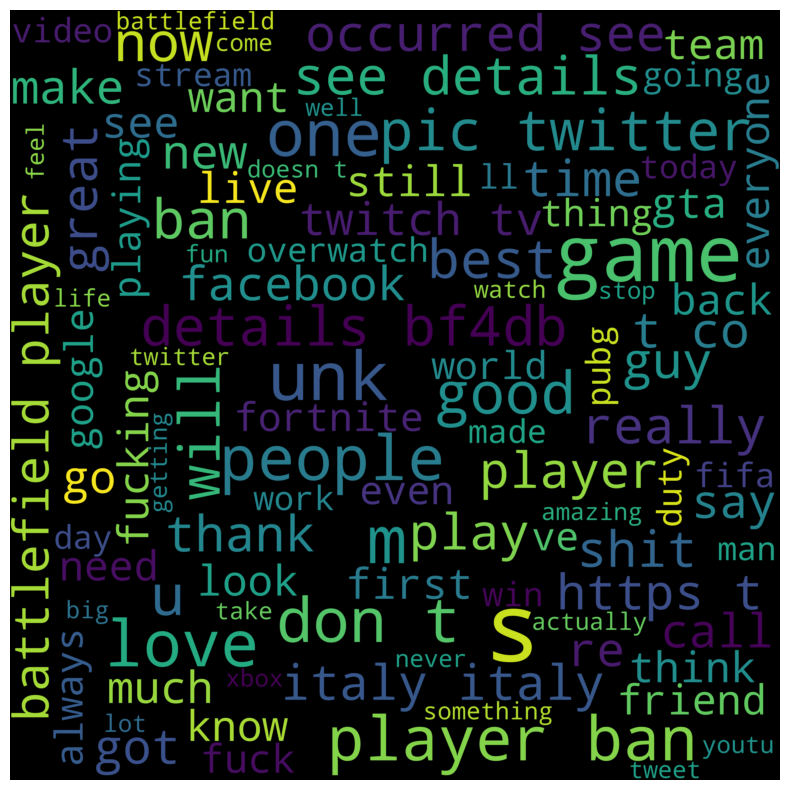

In [30]:
word_cloud_text = ''.join(df[df["type"]=="Irrelevant"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Then, on the neutral side, there are almost no curse words and the most important ones are different from the other 3 categories.

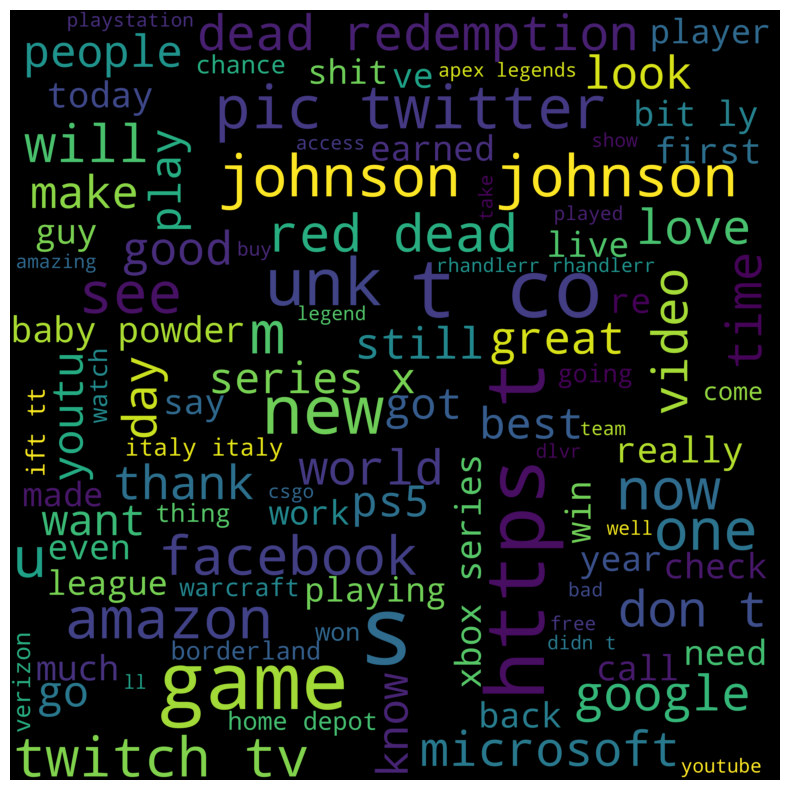

In [31]:
word_cloud_text = ''.join(df[df["type"]=="Neutral"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Finally, in this section, the information was grouped by the brand (or in this case the column information) to make a barplot that shows the number of tweets for each one.

In [33]:
#Count information per category
plot1=df.groupby(by=["information","type"]).count().reset_index()
plot1.head()

,information,type,id,text,lower
0,Amazon,Irrelevant,188,188,188
1,Amazon,Negative,566,566,566
2,Amazon,Neutral,1210,1210,1210
3,Amazon,Positive,306,306,306
4,ApexLegends,Irrelevant,188,188,188


As an interesting fact, the number of modified texts coincides with the id. For this reason, as the ID is unique, the following barplot shows that for games such as MaddenNFL and NBA2K the number of negative tweets is the highest while on the other brands the trend is different.

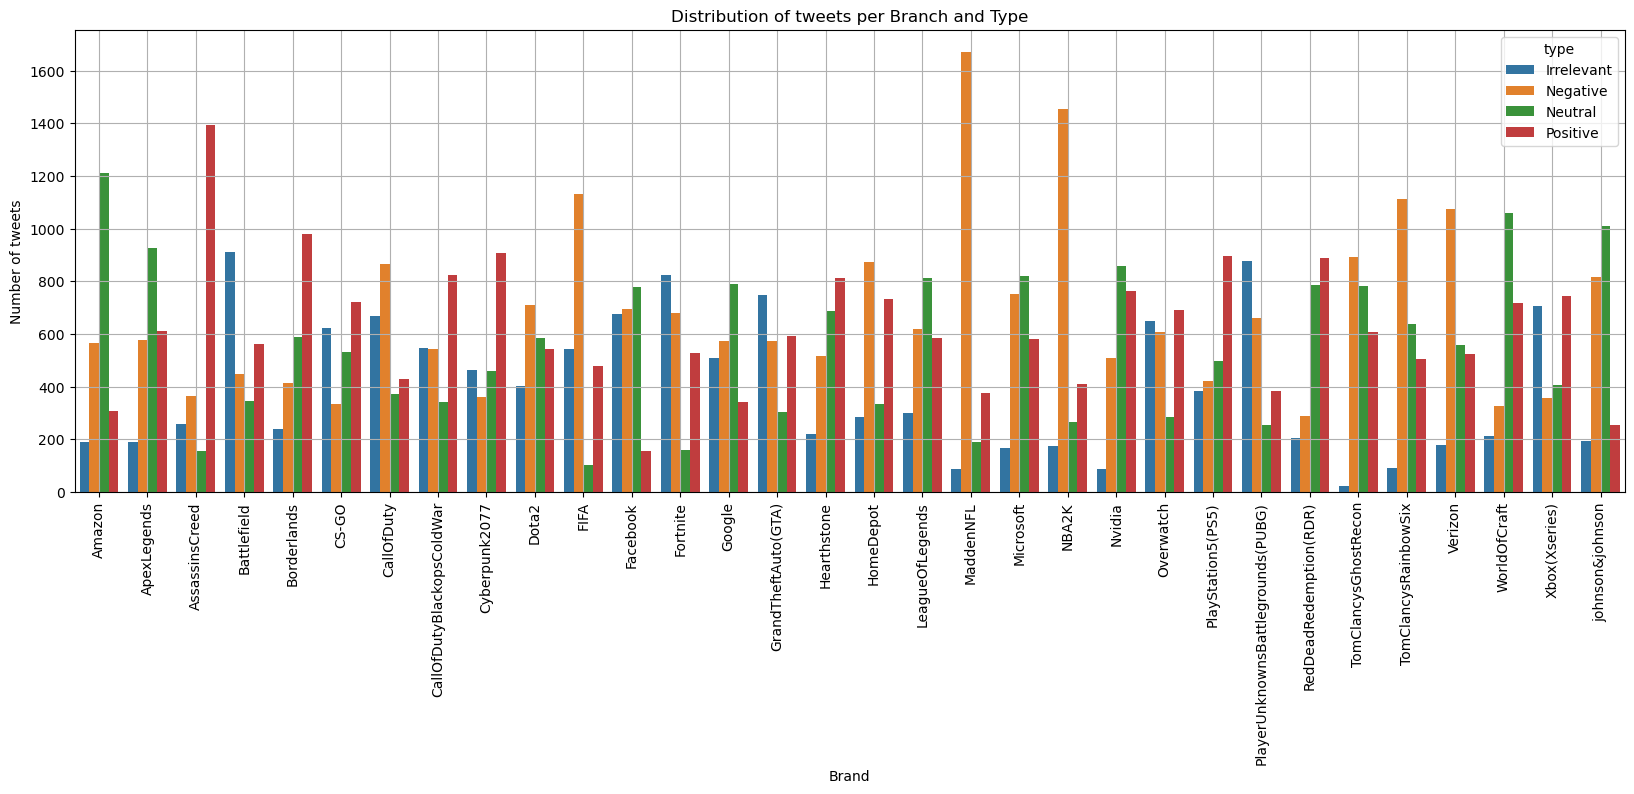

In [34]:
#Figure of comparison per branch
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="information",y="id",hue="type")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

# 3. Text analysis

With the clean text, the initial number of unique tokens was counted to identify the model complexity. As presented, there are more than 30 thousand unique words.

In [35]:

#Text splitting
tokens_text = [word_tokenize(str(word)) for word in df.lower]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  30955


The tokens_text variable groups all the texts by the different words stored on a List.

In [36]:
tokens_text[1]

['i',
 'am',
 'coming',
 'to',
 'the',
 'borders',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all']

Also, the main English stopwords were saved on an additional variable, to be used in the following modeling.

In [37]:
#Choosing english stopwords
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

# 4. Logistic Regression model

For the main regression model, it was used a simple Logistic Regression of the sklearn library alongside the Bag of Words (BoW) approach. This last method helps to classify and group the relevant data to help the model identify the proper trends.

On this first BoW, the stopwords were considered alongside a default ngram of 1.

In [39]:
#Initial Bag of Words
bow_counts1 = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)
   

Then, the main data was split on train and test datasets alongside the encoding of the words by using the training dataset as a reference:

In [41]:
#Train - Test splitting
reviews_train, reviews_test = train_test_split(df, test_size=0.2, random_state=0)

In [42]:

reviews_train.lower
     

50505    fifa  assignments and hillary done my bank a f...
20928                            had to pose my new       
30577                             take a look at my video 
28433    a zip big zip pop a step and a bam youre dead ...
71016    what is your banning process  ubisoftsupport  ...
                               ...                        
22206    pubg  csgo  overwatch  cod   exists  fortnite ...
47896    had the perhaps worst boring customer service ...
44505    hey hey  verizonfios  verizon why is my intern...
45483     verizon  is done with y all  y all spend too ...
71165    smashing on simple recon breakpoint and loving...
Name: lower, Length: 57711, dtype: object

In [43]:
reviews_train.lower

50505    fifa  assignments and hillary done my bank a f...
20928                            had to pose my new       
30577                             take a look at my video 
28433    a zip big zip pop a step and a bam youre dead ...
71016    what is your banning process  ubisoftsupport  ...
                               ...                        
22206    pubg  csgo  overwatch  cod   exists  fortnite ...
47896    had the perhaps worst boring customer service ...
44505    hey hey  verizonfios  verizon why is my intern...
45483     verizon  is done with y all  y all spend too ...
71165    smashing on simple recon breakpoint and loving...
Name: lower, Length: 57711, dtype: object

In [44]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts1.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts1.transform(reviews_test.lower)

D:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [45]:
X_train_bow

<57711x29429 sparse matrix of type '<class 'numpy.int64'>'
	with 644380 stored elements in Compressed Sparse Row format>

In [46]:
X_test_bow

<14428x29429 sparse matrix of type '<class 'numpy.int64'>'
	with 159312 stored elements in Compressed Sparse Row format>

In [47]:
#Labels for train and test encoding
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

In [48]:
y_train_bow

50505    Negative
20928    Positive
30577     Neutral
28433     Neutral
71016    Negative
           ...   
22206     Neutral
47896    Negative
44505    Negative
45483    Negative
71165    Positive
Name: type, Length: 57711, dtype: object

The total number of tweets for each category shows that negative and positive are the most registered while the irrelevant is the lowest

In [49]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

Negative      0.299002
Positive      0.270724
Neutral       0.254297
Irrelevant    0.175977
Name: type, dtype: float64

With this data, the Logistic Regression Model was trained, where accuracy of 83% on the test dataset was obtained while on the validation dataset this value increased to 96%.

In [50]:
# Logistic regression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  83.85777654560577


In [51]:
val_data["lower"]=val_data.text.str.lower() #lowercase
val_data["lower"]=[str(data) for data in val_data.lower] #converting all to string
val_data["lower"]=val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

In [52]:
#Validation data
X_val_bow = bow_counts1.transform(val_data.lower)
y_val_bow = val_data['type']

In [53]:
X_val_bow

<1000x29429 sparse matrix of type '<class 'numpy.int64'>'
	with 13449 stored elements in Compressed Sparse Row format>

In [54]:
Val_res = model1.predict(X_val_bow)

print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)

Accuracy:  96.0


In [58]:
import joblib
model_file = (r'C:\Users\hp\OneDrive\Desktop\CDAC-DBDA\2024\Internship\prodigy_infotech\LR1.pkl')

# Save the model to the file path
joblib.dump(model1, model_file)

print("Logistic regression model saved successfully to:", model_file)

Logistic regression model saved successfully to: C:\Users\hp\OneDrive\Desktop\CDAC-DBDA\2024\Internship\prodigy_infotech\LR1.pkl


In [59]:

import joblib
model_file = r'C:\Users\hp\OneDrive\Desktop\CDAC-DBDA\2024\Internship\prodigy_infotech\CV1.pkl'

# Save the model to the file path
joblib.dump(bow_counts1, model_file)

print("Logistic regression model saved successfully to:", model_file)

Logistic regression model saved successfully to: C:\Users\hp\OneDrive\Desktop\CDAC-DBDA\2024\Internship\prodigy_infotech\CV1.pkl


In [61]:
import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Load the trained model
model1 = joblib.load(r'C:\Users\hp\OneDrive\Desktop\CDAC-DBDA\2024\Internship\prodigy_infotech\LR1.pkl')  # Replace 'trained_model.pkl' with the path to your trained model file

# Load the CountVectorizer used during training
vectorizer = joblib.load(r'C:\Users\hp\OneDrive\Desktop\CDAC-DBDA\2024\Internship\prodigy_infotech\CV1.pkl')  # Replace 'count_vectorizer.pkl' with the path to your CountVectorizer file

# Input text
input_text = ["love"]

# Print input text
print(input_text)

#X_train_bow = bow_counts.fit_transform(reviews_train.lower)
# Transform input text using the loaded CountVectorizer
X_test_bow = vectorizer.transform(input_text)

# Make predictions using the trained model
predictions = model1.predict(X_test_bow)

# Print predictions
print("Predictions:", predictions[0])

['love']
Predictions: Positive


D:\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(
